## Initial EDA

Here we will load in the data and first look at our target variable


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    df.drop(columns = 'Y', inplace = True)

    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head().T

,1,2,3,4,5
ID,,,,,
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [3]:
y.head()

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
dtypes: object(23)
memory usage: 5.5+ MB


Since every column is an object, we'll have to convert them to a numeric type. We'll use the data dictionary from UCI Machine Learning Repository website as a preliminary data dictionary to guide us.

From the UCI Machine Learning Repository website:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1 (LIMIT_BIL): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2 (SEX): (1 = male; 2 = female). 
- X3 (EDUCATION): (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4 (MARITAL STATUS): (1 = married; 2 = single; 3 = others). 
- X5 (AGE): (year). 
- X6 - X11 (PAY_0 : PAY_6): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17 (BILL_AMT1 : BILL_AMT6): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23 (PAY_AMT1 : PAY_AMT6): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- Y: Made a default payment (Yes = 1, No = 0)

All of these columns should be columns should be numeric, so let's convert it all to numeric

In [5]:
df = df.astype('float32')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null float32
SEX          30000 non-null float32
EDUCATION    30000 non-null float32
MARRIAGE     30000 non-null float32
AGE          30000 non-null float32
PAY_0        30000 non-null float32
PAY_2        30000 non-null float32
PAY_3        30000 non-null float32
PAY_4        30000 non-null float32
PAY_5        30000 non-null float32
PAY_6        30000 non-null float32
BILL_AMT1    30000 non-null float32
BILL_AMT2    30000 non-null float32
BILL_AMT3    30000 non-null float32
BILL_AMT4    30000 non-null float32
BILL_AMT5    30000 non-null float32
BILL_AMT6    30000 non-null float32
PAY_AMT1     30000 non-null float32
PAY_AMT2     30000 non-null float32
PAY_AMT3     30000 non-null float32
PAY_AMT4     30000 non-null float32
PAY_AMT5     30000 non-null float32
PAY_AMT6     30000 non-null float32
dtypes: float32(23)
memory usage: 2.9+ MB


## Let's look at the target variable.

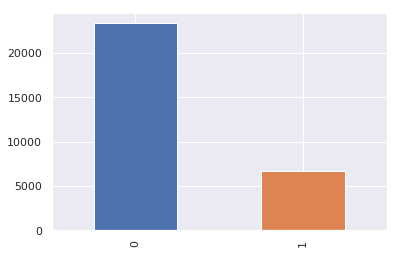

In [7]:
y.value_counts().plot(kind='bar')

There is some inbalance here, so we need to note to do some sort of imbalance handling later in the pipeline.

## Univariate EDA
Now let's look at some univariate plots to get a sense of what our features look like. Looking at the values that some of the features take, we'll look at the features in the following order:

- LIMIT_BAL
- SEX, EDUCATION, MARRIAGE
- AGE
- PAY_0 : PAY_6
- BILL_AMT1 : BILL_AMT6
- PAY_AMT1 : PAY_AMT6

In [8]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object', name='ID')

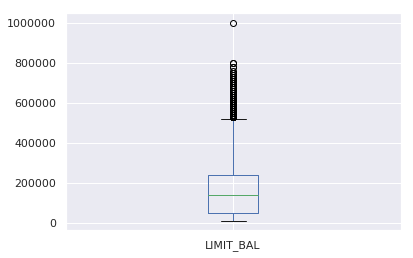

In [9]:
#LIMIT_BAL:

df['LIMIT_BAL'].plot(kind='box')

Notes: right-tailed distribution, has some outliers present. Some transormation may be necessary.

Next, look at the next three variables: SEX, EDUCATION, AND MARRIAGE

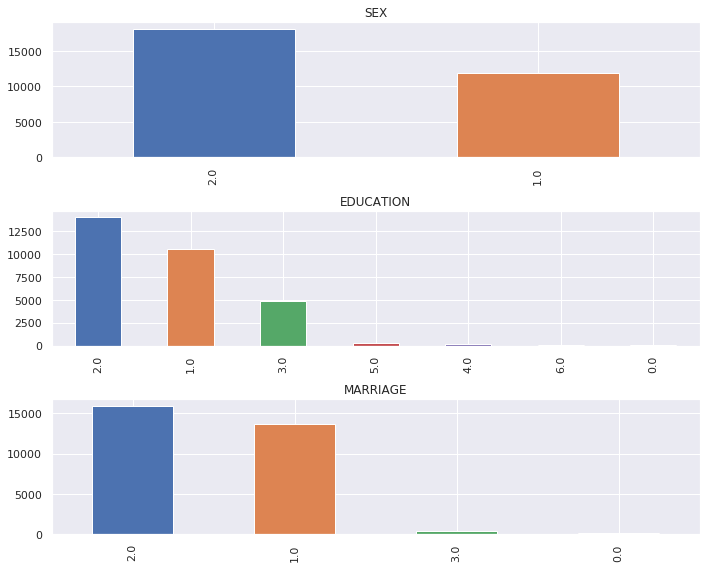

In [10]:
custom_df = df.loc[:, ['SEX', 'EDUCATION', 'MARRIAGE']]
fig = plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
ax1 = custom_df['SEX'].value_counts().plot(kind='bar')
ax1.set_title('SEX')

plt.subplot(3,1,2)
ax2 = custom_df['EDUCATION'].value_counts().plot(kind='bar')
ax2.set_title('EDUCATION')

plt.subplot(3,1,3)
ax3 = custom_df['MARRIAGE'].value_counts().plot(kind='bar')
ax3.set_title('MARRIAGE')

plt.tight_layout()
                   
    

Some notes: more females than males in females in the dataset, many more people who went to college than who did not, about an even amount of people who are married vs unmarried. Not much important things to notice here either. 

Next, look at age.

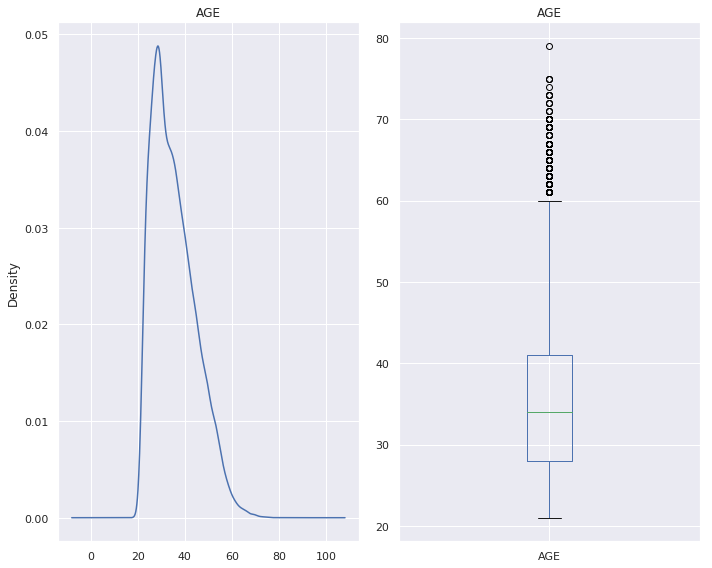

In [11]:

fig = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
ax1 = df['AGE'].plot(kind='density')
ax1.set_title('AGE')

plt.subplot(1,2,2)
ax2 = df['AGE'].plot(kind='box')
ax2.set_title('AGE')

plt.tight_layout()


Some notes: Approaching a gaussian distribution. Just has some older customers that creates a slight right tailed shape. Light massaging needed here.

Next, look at PAY_0 : PAY_6

<Figure size 720x576 with 0 Axes>

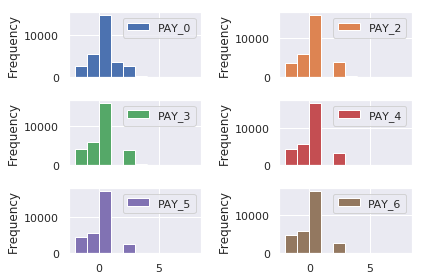

In [12]:
fig = plt.figure(figsize = (10,8))
def payment_history_plot(columns, layout, design):

    df_pay_hist = df.loc[:, columns]

    #fig, ax = plt.subplots(figsize = (10,8), sharex=True)

    
    #for i in range(len(columns)):
        #plt.subplot(3,2,i)
    ax = df_pay_hist.plot(kind = design, subplots = True, layout = layout, sharex=True)
    plt.tight_layout()
    plt.show()
    
payment_history_plot(columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], layout = (3,2), design = 'hist')
        


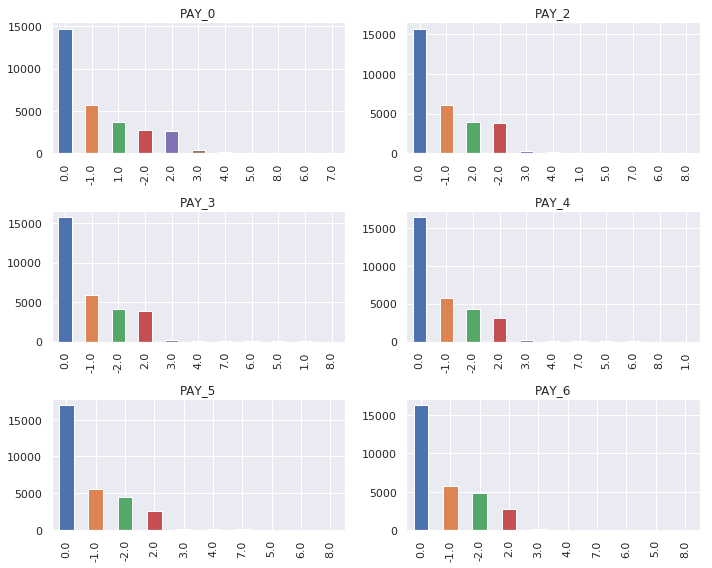

In [13]:
#create group
df_pay_hist = df.iloc[:,5:11]

fig, ax = plt.subplots(figsize = (10,8), sharex=True)


plt.subplot(3,2,1)
ax1 = df['PAY_0'].value_counts().plot(kind='bar')
ax1.set_title('PAY_0')

plt.subplot(3,2,2)
ax2 = df['PAY_2'].value_counts().plot(kind='bar')
ax2.set_title('PAY_2')


plt.subplot(3,2,3)
ax3 = df['PAY_3'].value_counts().plot(kind='bar')
ax3.set_title('PAY_3')


plt.subplot(3,2,4)
ax4 = df['PAY_4'].value_counts().plot(kind='bar')
ax4.set_title('PAY_4')


plt.subplot(3,2,5)
ax5 = df['PAY_5'].value_counts().plot(kind='bar')
ax5.set_title('PAY_5')


plt.subplot(3,2,6)
ax6 = df['PAY_6'].value_counts().plot(kind='bar')
ax6.set_title('PAY_6')

plt.tight_layout()




Some notes: all the plots are pretty much the same. Values of 0 are the most common by a large amount, i.e. another instance of some class inbalance. Might have to bin some of the values together to a bigger value; e.g.  "more than 2 months" class. 

Next, look at the Bill amounts.

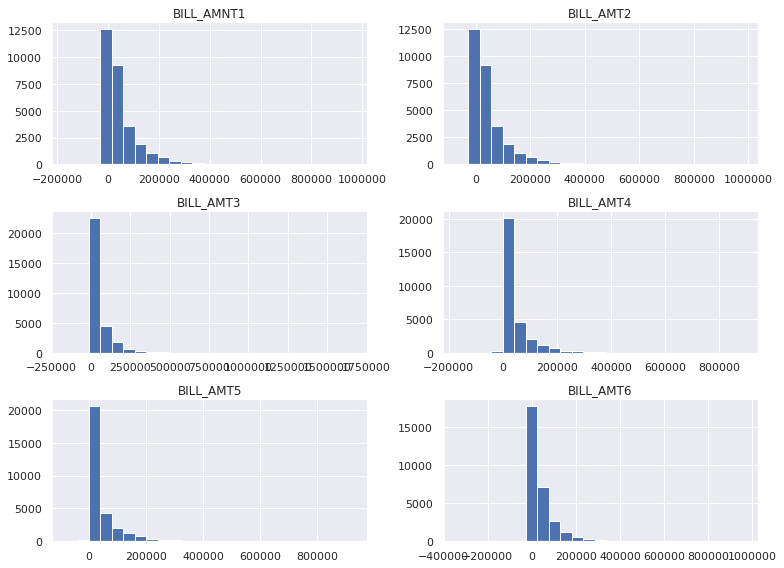

In [14]:
#create bill_amnts group
fig = plt.figure(figsize = (11,8))
bill_amts = df.iloc[:, 11:17]


plt.subplot(3,2,1)
ax1 = bill_amts['BILL_AMT1'].hist(bins=25)
ax1.set_title('BILL_AMNT1')

plt.subplot(3,2,2)
ax2 = bill_amts['BILL_AMT2'].hist(bins=25)
ax2.set_title('BILL_AMT2')

plt.subplot(3,2,3)
ax3 = bill_amts['BILL_AMT3'].hist(bins=25)
ax3.set_title('BILL_AMT3')

plt.subplot(3,2,4)
ax4 = bill_amts['BILL_AMT4'].hist(bins=25)
ax4.set_title('BILL_AMT4')

plt.subplot(3,2,5)
ax5 = bill_amts['BILL_AMT5'].hist(bins=25)
ax5.set_title('BILL_AMT5')

plt.subplot(3,2,6)
ax6 = bill_amts['BILL_AMT6'].hist(bins=25)
ax6.set_title('BILL_AMT6')

plt.tight_layout()





Text(0.5, 1.0, 'BILL_AMT')

<Figure size 720x576 with 0 Axes>

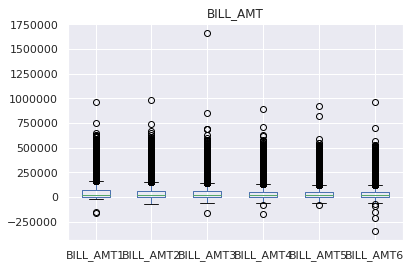

In [15]:
fig = plt.figure(figsize = (10,8))
ax1 = bill_amts.plot(kind='box')
ax1.set_title('BILL_AMT')

Some notes: most distributions are right tailed, lending itself to a transformation. Strong outliers

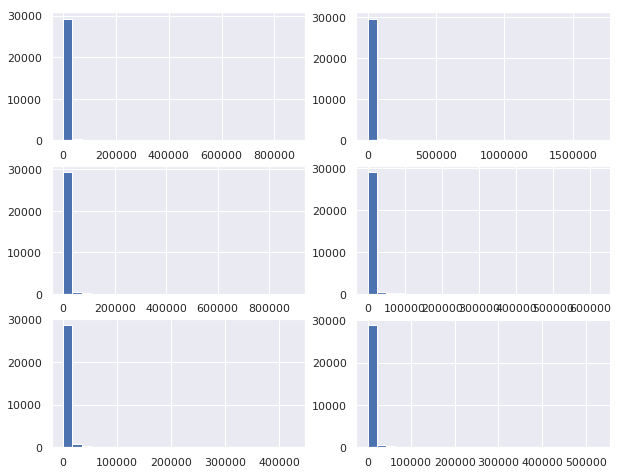

In [26]:
#create pay_amts group
ax, fig = plt.subplots(figsize = (10,8))
pay_amts = df.iloc[:, 17:]

plt.subplot(3,2,1)
pay_amts['PAY_AMT1'].hist(bins=25)

plt.subplot(3,2,2)
pay_amts['PAY_AMT2'].hist(bins=25)

plt.subplot(3,2,3)
pay_amts['PAY_AMT3'].hist(bins=25)

plt.subplot(3,2,4)
pay_amts['PAY_AMT4'].hist(bins=25)

plt.subplot(3,2,5)
pay_amts['PAY_AMT5'].hist(bins=25)

plt.subplot(3,2,6)
pay_amts['PAY_AMT6'].hist(bins=25)




In [43]:
pay_amts['PAY_AMT1'].sort_values(ascending=False)

30000    873552.0
29999    505000.0
29998    493358.0
29997    423903.0
29996    405016.0
29995    368199.0
29994    323014.0
29993    304815.0
29992    302000.0
29991    300039.0
29990    300000.0
29989    298887.0
29988    276698.0
29987    273844.0
29986    272817.0
29985    261524.0
29984    260416.0
29983    260000.0
29982    250000.0
29981    247562.0
29980    244500.0
29979    242247.0
29978    240101.0
29977    239104.0
29976    238861.0
29975    237000.0
29974    236533.0
29973    235728.0
29972    234000.0
29971    232557.0
           ...   
3517          0.0
3518          0.0
3519          0.0
3520          0.0
3521          0.0
3522          0.0
3523          0.0
3524          0.0
3525          0.0
3508          0.0
3507          0.0
3506          0.0
3496          0.0
3489          0.0
3490          0.0
3491          0.0
3492          0.0
3493          0.0
3494          0.0
3495          0.0
3497          0.0
3505          0.0
3498          0.0
3499          0.0
3500      